<a href="https://colab.research.google.com/github/Resia05/supervised-learning/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22HW_2_8_%D0%9F%D0%BE%D0%BB%D1%96%D0%BD%D0%BE%D0%BC%D1%96%D0%B0%D0%BB%D1%8C%D0%BD%D1%96_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8_Pipelines_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Опис завдання

В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

# Імпорт

In [60]:
from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
import joblib
import warnings

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Збирання коду

Area under ROC score on Train dataset: 0.90
F1 Score on Train dataset: 0.67


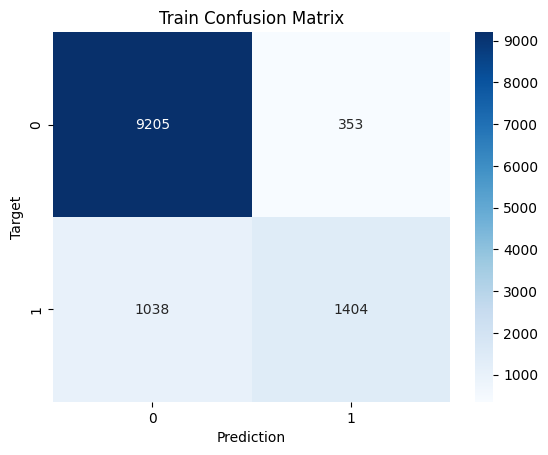

Area under ROC score on Validation dataset: 0.88
F1 Score on Validation dataset: 0.64


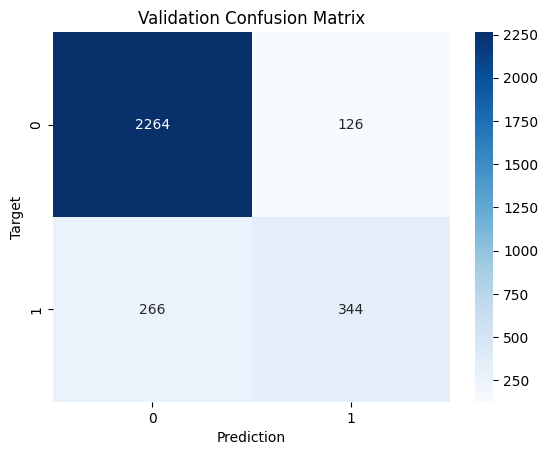

Validation Accuracy of loaded model: 0.8693333333333333


In [61]:
# Читання даних з файлу
raw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/train.csv", index_col=0)

# Розбиття на тренувальний і валідаційний набори
train_df, val_df = train_test_split(raw_df, test_size=0.2, stratify=raw_df['Exited'], random_state=42)

# Визначення колонок
input_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography', 'Surname', 'Gender']
target_col = 'Exited'
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_cols = ['Geography', 'Surname']
label_cols = ['Gender']

# Виділення тренувальних і валідаційних наборів
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# Трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

label_transformer = Pipeline(steps=[
    ('map_gender', OneHotEncoder(categories=[['Female', 'Male']], drop='first', sparse_output=False))
])

# Об'єднання трансформерів
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('lbl', label_transformer, label_cols)
    ])

# Пайплайн для моделі
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренування пайплайну
model_pipeline.fit(train_inputs, train_targets)

# Функція для передбачення і підрахунку метрик
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    proba = model_pipeline.predict_proba(inputs)[:, 1]
    roc_auc = roc_auc_score(targets, proba)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}")
    confusion_matrix_ = confusion_matrix(targets, preds)
    f1 = f1_score(targets, preds)
    print(f"F1 Score on {name} dataset: {f1:.2f}")
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return preds

# Оцінка моделі на тренувальних і валідаційних даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, name='Train')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, name='Validation')

# Збереження моделі
joblib.dump(model_pipeline, 'log_reg_pipeline.joblib')

# Перевірка завантаженої моделі
model_loaded = joblib.load('log_reg_pipeline.joblib')
val_preds_2 = model_loaded.predict(val_inputs)
val_accuracy_2 = (val_preds_2 == val_targets).mean()
print("Validation Accuracy of loaded model:", val_accuracy_2)


# генерація polinomal features до степені 2

**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

Area under ROC score on Train dataset: 0.93
F1 Score on Train dataset: 0.70


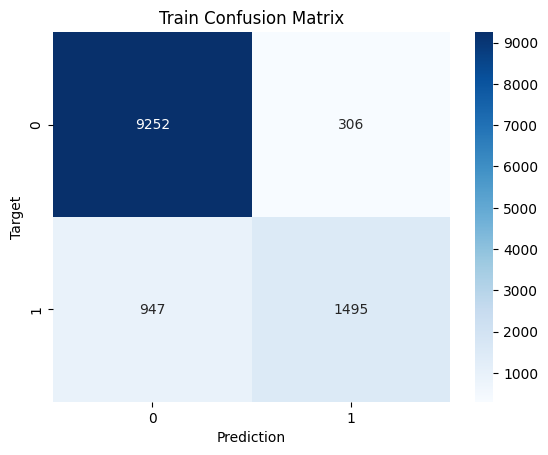

Area under ROC score on Validation dataset: 0.91
F1 Score on Validation dataset: 0.67


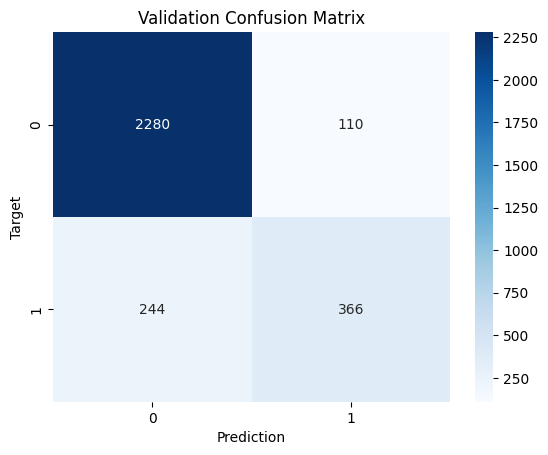

Validation Accuracy of loaded model: 0.882


In [62]:
# Читання даних з файлу
raw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/train.csv", index_col=0)

# Розбиття на тренувальний і валідаційний набори
train_df, val_df = train_test_split(raw_df, test_size=0.2, stratify=raw_df['Exited'], random_state=42)

# Визначення колонок
input_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography', 'Surname', 'Gender']
target_col = 'Exited'
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_cols = ['Geography', 'Surname']
label_cols = ['Gender']

# Виділення тренувальних і валідаційних наборів
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# Трансформери для числових і категоріальних колонок з додаванням поліноміальних ознак
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

label_transformer = Pipeline(steps=[
    ('map_gender', OneHotEncoder(categories=[['Female', 'Male']], drop='first', sparse_output=False))
])

# Об'єднання трансформерів
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('lbl', label_transformer, label_cols)
    ])

# Пайплайн для моделі
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренування пайплайну
model_pipeline.fit(train_inputs, train_targets)

# Функція для передбачення і підрахунку метрик
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    proba = model_pipeline.predict_proba(inputs)[:, 1]
    roc_auc = roc_auc_score(targets, proba)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}")
    confusion_matrix_ = confusion_matrix(targets, preds)
    f1 = f1_score(targets, preds)
    print(f"F1 Score on {name} dataset: {f1:.2f}")
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return preds

# Оцінка моделі на тренувальних і валідаційних даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, name='Train')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, name='Validation')

# Збереження моделі
joblib.dump(model_pipeline, 'log_reg_pipeline_with_poly.joblib')

# Перевірка завантаженої моделі
model_loaded = joblib.load('log_reg_pipeline_with_poly.joblib')
val_preds_2 = model_loaded.predict(val_inputs)
val_accuracy_2 = (val_preds_2 == val_targets).mean()
print("Validation Accuracy of loaded model:", val_accuracy_2)


З урахуванням високих значень метрик ROC AUC і F1 Score на тренувальному наборі, порівняно з валідаційним, можна зробити припущення, що модель може демонструвати деякі ознаки перенавчання (overfitting). Однак, різниця в метриках не є дуже значною, що свідчить про те, що перенавчання не є суттєвим.

Модель має досить високу генералізаційну здатність, оскільки метрики на валідаційному наборі є прийнятними і близькими до метрик на тренувальному наборі. Вона здатна добре працювати на нових, раніше не бачених даних.

# генерація polinomal features до степені 4

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

Area under ROC score on Train dataset: 0.94
F1 Score on Train dataset: 0.75


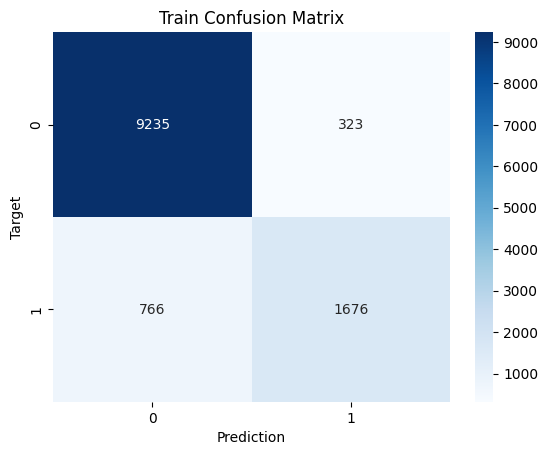

Area under ROC score on Validation dataset: 0.93
F1 Score on Validation dataset: 0.72


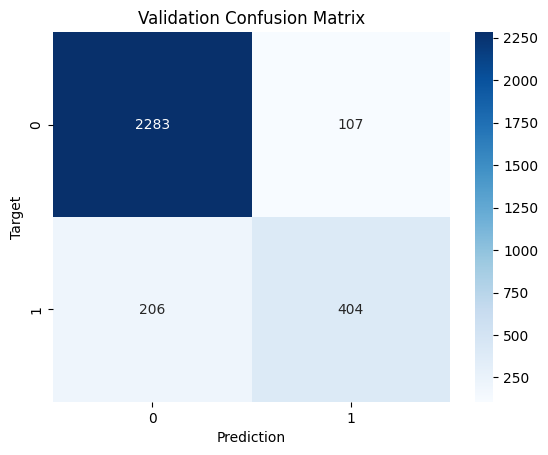

Validation Accuracy of loaded model: 0.8956666666666667


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Читання даних з файлу
raw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/train.csv", index_col=0)

# Розбиття на тренувальний і валідаційний набори
train_df, val_df = train_test_split(raw_df, test_size=0.2, stratify=raw_df['Exited'], random_state=42)

# Визначення колонок
input_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography', 'Surname', 'Gender']
target_col = 'Exited'
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_cols = ['Geography', 'Surname']
label_cols = ['Gender']

# Виділення тренувальних і валідаційних наборів
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# Трансформери для числових і категоріальних колонок з додаванням поліноміальних ознак до степені 4
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

label_transformer = Pipeline(steps=[
    ('map_gender', OneHotEncoder(categories=[['Female', 'Male']], drop='first', sparse_output=False))
])

# Об'єднання трансформерів
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('lbl', label_transformer, label_cols)
    ])

# Пайплайн для моделі
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренування пайплайну
model_pipeline.fit(train_inputs, train_targets)

# Функція для передбачення і підрахунку метрик
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    proba = model_pipeline.predict_proba(inputs)[:, 1]
    roc_auc = roc_auc_score(targets, proba)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}")
    confusion_matrix_ = confusion_matrix(targets, preds)
    f1 = f1_score(targets, preds)
    print(f"F1 Score on {name} dataset: {f1:.2f}")
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return preds

# Оцінка моделі на тренувальних і валідаційних даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, name='Train')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, name='Validation')

# Збереження моделі
joblib.dump(model_pipeline, 'log_reg_pipeline_with_poly_degree_4.joblib')

# Перевірка завантаженої моделі
model_loaded = joblib.load('log_reg_pipeline_with_poly_degree_4.joblib')
val_preds_2 = model_loaded.predict(val_inputs)
val_accuracy_2 = (val_preds_2 == val_targets).mean()
print("Validation Accuracy of loaded model:", val_accuracy_2)


Area under ROC Score:

На тренувальному наборі: 0.94
На валідаційному наборі: 0.93
Обидва значення ROC AUC (0.94 на тренувальному і 0.93 на валідаційному) залишаються високими, що свідчить про добру роздільну здатність моделі на тренувальному і валідаційному наборах.

F1 Score:

На тренувальному наборі: 0.75
На валідаційному наборі: 0.72
Значення F1 Score також вищі, ніж у попередньому випадку, що свідчить про покращення у точності класифікації моделі на нових даних.

Validation Accuracy: 0.8956666666666667

Точність моделі на валідаційному наборі становить приблизно 89.57%, що також є дуже добрим показником.

Модель з поліноміальними ознаками до степені 4 є покращеною в порівнянні з попередньою версією, зберігаючи при цьому високу якість і здатність до генералізації.

#  Перенавчання і регуляризація

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


Training MSE: 3.0004871419391996e-26
Test MSE: 166.3650520334879
Training R2: 1.0
Test R2: 0.928692506934706


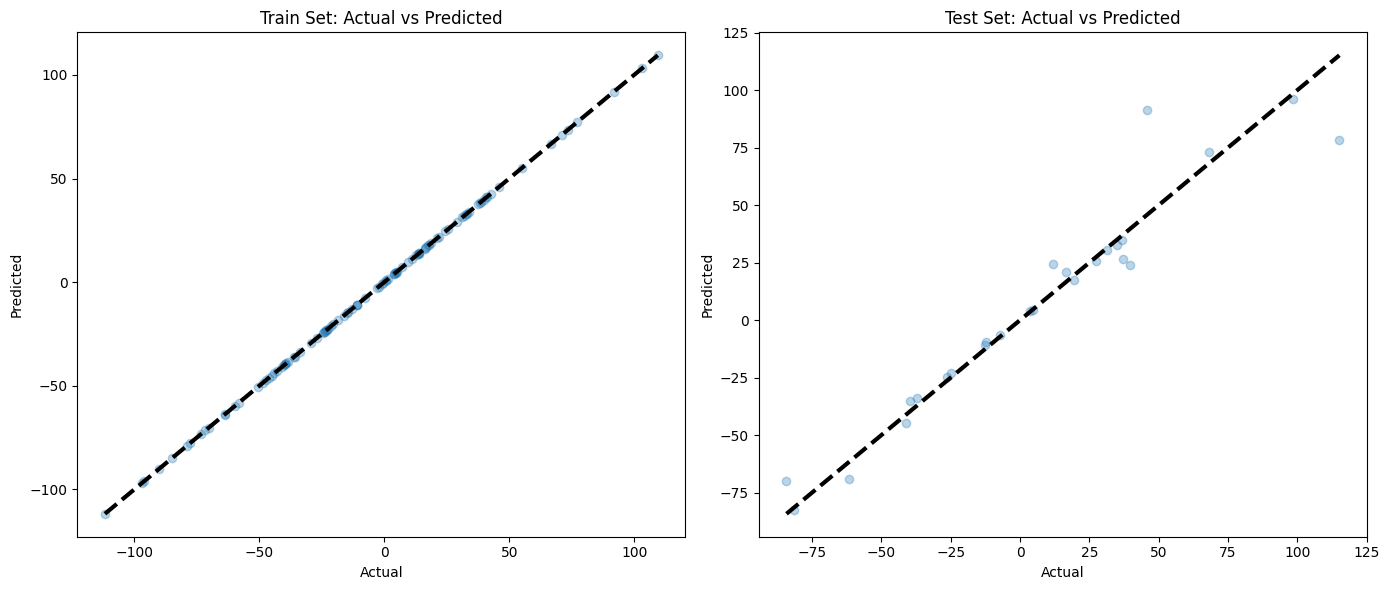

In [64]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/regression_data.csv")

# Розбиття на тренувальний і тестовий набори
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Виділення колонок
numeric_cols = train_df.columns.drop('target').tolist()
target_col = 'target'

# Виділення тренувальних і тестових наборів
train_inputs = train_df[numeric_cols]
train_targets = train_df[target_col]
test_inputs = test_df[numeric_cols]
test_targets = test_df[target_col]

# Трансформери для числових колонок з додаванням поліноміальних ознак до степені 5
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scaler', MinMaxScaler())
])

# Об'єднання трансформерів
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# Пайплайн для моделі
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Тренування пайплайну
model_pipeline.fit(train_inputs, train_targets)

# Прогнозування на тренувальних і тестових даних
train_preds = model_pipeline.predict(train_inputs)
test_preds = model_pipeline.predict(test_inputs)

# Оцінка якості моделі
train_mse = mean_squared_error(train_targets, train_preds)
test_mse = mean_squared_error(test_targets, test_preds)
train_r2 = r2_score(train_targets, train_preds)
test_r2 = r2_score(test_targets, test_preds)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Test R2: {test_r2}')

# Побудова графіків для візуалізації результатів
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_targets, train_preds, alpha=0.3)
plt.plot([train_targets.min(), train_targets.max()], [train_targets.min(), train_targets.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Set: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(test_targets, test_preds, alpha=0.3)
plt.plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

Модель має дуже низьке значення MSE на тренувальному наборі, що свідчить про високу точність у відтворенні тренувальних даних. Однак, велике значення MSE на тестовому наборі може вказувати на те, що модель може бути менш ефективною у прогнозуванні нових даних, що не входять у тренувальний набір.



# моделі Lasso(), Ridge(), ElasaticNet()

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лог регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [15]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/regression_data.csv")

# Розбиття на тренувальний і тестовий набори
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Виділення колонок
numeric_cols = train_df.columns.drop('target').tolist()
target_col = 'target'

# Виділення тренувальних і тестових наборів
train_inputs = train_df[numeric_cols]
train_targets = train_df[target_col]
test_inputs = test_df[numeric_cols]
test_targets = test_df[target_col]

# Трансформери для числових колонок з додаванням поліноміальних ознак до степені 20
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('scaler', MinMaxScaler())
])

# Об'єднання трансформерів
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# Створення пайплайнів для моделей
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.01, max_iter=10000))
])

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

elasticnet_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000))
])

# Тренування моделей
lasso_pipeline.fit(train_inputs, train_targets)
ridge_pipeline.fit(train_inputs, train_targets)
elasticnet_pipeline.fit(train_inputs, train_targets)

# Функція для оцінки моделі
def evaluate_model(model_pipeline, train_inputs, train_targets, test_inputs, test_targets, model_name):
    train_preds = model_pipeline.predict(train_inputs)
    test_preds = model_pipeline.predict(test_inputs)

    train_mse = mean_squared_error(train_targets, train_preds)
    test_mse = mean_squared_error(test_targets, test_preds)
    train_r2 = r2_score(train_targets, train_preds)
    test_r2 = r2_score(test_targets, test_preds)

    print(f'{model_name} - Training MSE: {train_mse}')
    print(f'{model_name} - Test MSE: {test_mse}')
    print(f'{model_name} - Training R2: {train_r2}')
    print(f'{model_name} - Test R2: {test_r2}')

    return train_preds, test_preds

# Оцінка моделей
lasso_train_preds, lasso_test_preds = evaluate_model(lasso_pipeline, train_inputs, train_targets, test_inputs, test_targets, "Lasso")
ridge_train_preds, ridge_test_preds = evaluate_model(ridge_pipeline, train_inputs, train_targets, test_inputs, test_targets, "Ridge")
elasticnet_train_preds, elasticnet_test_preds = evaluate_model(elasticnet_pipeline, train_inputs, train_targets, test_inputs, test_targets, "ElasticNet")


Lasso - Training MSE: 0.8964892548670887
Lasso - Test MSE: 5.511420360994875
Lasso - Training R2: 0.9995397495979711
Lasso - Test R2: 0.9976376915441805
Ridge - Training MSE: 73.92130758724947
Ridge - Test MSE: 5861.848271461734
Ridge - Training R2: 0.9620493928389853
Ridge - Test R2: -1.512509086841899
ElasticNet - Training MSE: 32.60240294196311
ElasticNet - Test MSE: 390.9767619306592
ElasticNet - Training R2: 0.9832621874945165
ElasticNet - Test R2: 0.8324192948020737


Модель логістичної регресії з поліноміальними ознаками до степені 20 включно демонструє найкращу загальну здатність до генералізації серед розглянутих. Вона досягає найменших значень помилки (MSE) на тестовому наборі і найвищих значень коефіцієнта детермінації (R2), що свідчить про високу точність і здатність пояснювати варіацію у нових даних. Моделі з регуляризацією також показали деякі переваги, але вони вимагають уваги до оптимізації параметрів для досягнення кращих результатів у відповіді на конкретні потреби даних.

# Визначення найкращої моделі

In [19]:
# Завантаження даних
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/regression_data.csv")
X = data.drop('target', axis=1)
y = data['target']

# Розбиття даних на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Поліноміальні ознаки до степені 20
poly = PolynomialFeatures(degree=20)
scaler = StandardScaler()

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Тренування моделей
lasso = Lasso(alpha=0.001, max_iter=10000)
ridge = Ridge(alpha=0.001)
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000)

lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
elasticnet.fit(X_train_scaled, y_train)

# Оцінка моделей
models = {
    'Lasso': lasso,
    'Ridge': ridge,
    'ElasticNet': elasticnet
}

best_model = None
best_mse = float('inf')
best_model_name = ""

for name, model in models.items():
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    print(f"{name} - Training MSE: {train_mse}")
    print(f"{name} - Test MSE: {test_mse}")
    print(f"{name} - Training R2: {train_r2}")
    print(f"{name} - Test R2: {test_r2}")
    print()

    if test_mse < best_mse:
        best_mse = test_mse
        best_model = model
        best_model_name = name

print(f"The best model is {best_model_name} with Test MSE: {best_mse}")

# Збереження найкращої моделі
joblib.dump(best_model, 'best_model.joblib')

# Завантаження та перевірка найкращої моделі
loaded_best_model = joblib.load('best_model.joblib')
test_preds_loaded = loaded_best_model.predict(X_test_scaled)
test_mse_loaded = mean_squared_error(y_test, test_preds_loaded)
test_r2_loaded = r2_score(y_test, test_preds_loaded)

print(f"Loaded Best Model - Test MSE: {test_mse_loaded}")
print(f"Loaded Best Model - Test R2: {test_r2_loaded}")


Lasso - Training MSE: 0.0908055508113599
Lasso - Test MSE: 22.565210372994404
Lasso - Training R2: 0.9999533811576207
Lasso - Test R2: 0.9903280853609489

Ridge - Training MSE: 1.1660634462802212e-05
Ridge - Test MSE: 4271.691747194594
Ridge - Training R2: 0.9999999940135237
Ridge - Test R2: -0.8309351989313136

ElasticNet - Training MSE: 0.03104765672573189
ElasticNet - Test MSE: 87.32378752904168
ElasticNet - Training R2: 0.9999840603817475
ElasticNet - Test R2: 0.9625712233576019

The best model is Lasso with Test MSE: 22.565210372994404
Loaded Best Model - Test MSE: 22.565210372994404
Loaded Best Model - Test R2: 0.9903280853609489
